In [1]:
import pandas as pd
import boto3

In [2]:
import sys

In [3]:
import json

In [4]:
import matplotlib.pyplot

In [5]:
comprehend = boto3.client(service_name='comprehend')

# Read Twitter Review File From S3

In [6]:
s3 = boto3.client(service_name = 's3')

In [7]:
resource = boto3.resource('s3') #high-level object-oriented API
my_bucket = resource.Bucket('your_bucket_name') #subsitute this for your s3 bucket name. 
obj = s3.get_object(Bucket='your_bucket_name', Key='twcs.csv')


In [8]:
twcs = pd.read_csv(obj['Body'])

In [9]:
twcs.head()

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id
0,1,sprintcare,False,Tue Oct 31 22:10:47 +0000 2017,@115712 I understand. I would like to assist y...,2,3.0
1,2,115712,True,Tue Oct 31 22:11:45 +0000 2017,@sprintcare and how do you propose we do that,NaN,1.0
2,3,115712,True,Tue Oct 31 22:08:27 +0000 2017,@sprintcare I have sent several private messag...,1,4.0
3,4,sprintcare,False,Tue Oct 31 21:54:49 +0000 2017,@115712 Please send us a Private Message so th...,3,5.0
4,5,115712,True,Tue Oct 31 21:49:35 +0000 2017,@sprintcare I did.,4,6.0


In [10]:
doc_customer = twcs.loc[twcs['inbound']==True]

In [11]:
doc_customer[0:5000]

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id
1,2,115712,True,Tue Oct 31 22:11:45 +0000 2017,@sprintcare and how do you propose we do that,NaN,1.0
2,3,115712,True,Tue Oct 31 22:08:27 +0000 2017,@sprintcare I have sent several private messag...,1,4.0
4,5,115712,True,Tue Oct 31 21:49:35 +0000 2017,@sprintcare I did.,4,6.0
6,8,115712,True,Tue Oct 31 21:45:10 +0000 2017,@sprintcare is the worst customer service,"9,6,10",NaN
8,12,115713,True,Tue Oct 31 22:04:47 +0000 2017,@sprintcare You gonna magically change your co...,"11,13,14",15.0
10,16,115713,True,Tue Oct 31 20:00:43 +0000 2017,@sprintcare Since I signed up with you....Sinc...,15,17.0
12,18,115713,True,Tue Oct 31 19:56:01 +0000 2017,@115714 y’all lie about your “great” connectio...,17,NaN
14,20,115715,True,Tue Oct 31 22:03:34 +0000 2017,"@115714 whenever I contact customer support, t...",19,NaN
16,22,115716,True,Tue Oct 31 22:16:48 +0000 2017,@Ask_Spectrum Would you like me to email you a...,25,21.0
18,26,115716,True,Tue Oct 31 22:19:56 +0000 2017,@Ask_Spectrum I received this from your corpor...,27,25.0


# Convert all the review texts into string and check the size 

In [12]:
whole_doc = ', '.join(map(str, twcs['text']))

In [13]:
#function to check the size of a string
def utf8len(s):
    return len(s.encode('utf-8'))

In [14]:
utf8len(whole_doc)

330596857

In [15]:
utf8len(doc_customer[0:5000].to_string())

970014

In [16]:
doc_customer = doc_customer[0:5000]

#  Sentiment Analysis on the first Twitter Review

In [17]:
twcs['text'][0]

'@115712 I understand. I would like to assist you. We would need to get you into a private secured link to further assist.'

In [18]:
print(json.dumps(comprehend.detect_sentiment(Text=twcs['text'][0], LanguageCode='en'), sort_keys=True, indent=4))

{
    "ResponseMetadata": {
        "HTTPHeaders": {
            "connection": "keep-alive",
            "content-length": "164",
            "content-type": "application/x-amz-json-1.1",
            "date": "Tue, 05 Mar 2019 20:32:25 GMT",
            "x-amzn-requestid": "c92b77d4-3f85-11e9-bd16-cd3f762c0119"
        },
        "HTTPStatusCode": 200,
        "RequestId": "c92b77d4-3f85-11e9-bd16-cd3f762c0119",
        "RetryAttempts": 0
    },
    "Sentiment": "NEUTRAL",
    "SentimentScore": {
        "Mixed": 0.006767329294234514,
        "Negative": 0.0044396319426596165,
        "Neutral": 0.953072190284729,
        "Positive": 0.035720765590667725
    }
}


# Divide huge list into batches

In [19]:
import yaml

In [20]:
def aws_sentiment(text):
    return yaml.load(json.dumps(comprehend.detect_sentiment(Text=text, LanguageCode='en'), sort_keys=True, indent=4))

In [21]:
total_result = doc_customer['text'].apply(aws_sentiment)

In [22]:
# result = {}
# for i in list(range(0,4)):
#     result.update(yaml.load(json.dumps(comprehend.batch_detect_sentiment(TextList=text_list[25*i:25*(i+1)], LanguageCode='en'), sort_keys=True, indent=4)))
#     print(type(result))

In [23]:
total_result[1]

{'ResponseMetadata': {'HTTPHeaders': {'connection': 'keep-alive',
   'content-length': '164',
   'content-type': 'application/x-amz-json-1.1',
   'date': 'Tue, 05 Mar 2019 20:32:25 GMT',
   'x-amzn-requestid': 'c966aba7-3f85-11e9-9d47-a546fac00a70'},
  'HTTPStatusCode': 200,
  'RequestId': 'c966aba7-3f85-11e9-9d47-a546fac00a70',
  'RetryAttempts': 0},
 'Sentiment': 'NEUTRAL',
 'SentimentScore': {'Mixed': 0.0017415637848898768,
  'Negative': 0.005325643811374903,
  'Neutral': 0.9845172762870789,
  'Positive': 0.00841548666357994}}

In [24]:
sentimentlist = []
for i in total_result:
    sentimentlist.append(i.get('Sentiment'))
sentimentlist

['NEUTRAL',
 'NEGATIVE',
 'NEUTRAL',
 'NEGATIVE',
 'NEUTRAL',
 'NEUTRAL',
 'NEGATIVE',
 'NEUTRAL',
 'NEUTRAL',
 'NEUTRAL',
 'NEUTRAL',
 'NEUTRAL',
 'NEGATIVE',
 'NEUTRAL',
 'NEUTRAL',
 'POSITIVE',
 'NEGATIVE',
 'NEUTRAL',
 'NEGATIVE',
 'NEUTRAL',
 'NEUTRAL',
 'NEUTRAL',
 'NEUTRAL',
 'NEUTRAL',
 'NEUTRAL',
 'NEUTRAL',
 'NEUTRAL',
 'NEUTRAL',
 'NEGATIVE',
 'NEGATIVE',
 'NEUTRAL',
 'NEGATIVE',
 'POSITIVE',
 'NEUTRAL',
 'NEUTRAL',
 'NEUTRAL',
 'POSITIVE',
 'NEUTRAL',
 'NEUTRAL',
 'NEUTRAL',
 'POSITIVE',
 'POSITIVE',
 'NEGATIVE',
 'NEUTRAL',
 'NEGATIVE',
 'NEUTRAL',
 'NEUTRAL',
 'NEGATIVE',
 'NEUTRAL',
 'NEUTRAL',
 'POSITIVE',
 'POSITIVE',
 'NEUTRAL',
 'NEUTRAL',
 'NEUTRAL',
 'NEUTRAL',
 'NEGATIVE',
 'NEUTRAL',
 'NEUTRAL',
 'NEUTRAL',
 'NEUTRAL',
 'NEUTRAL',
 'NEUTRAL',
 'NEUTRAL',
 'NEGATIVE',
 'POSITIVE',
 'POSITIVE',
 'NEUTRAL',
 'NEUTRAL',
 'NEUTRAL',
 'NEUTRAL',
 'POSITIVE',
 'NEUTRAL',
 'NEUTRAL',
 'NEUTRAL',
 'NEUTRAL',
 'NEUTRAL',
 'NEUTRAL',
 'NEUTRAL',
 'NEUTRAL',
 'NEUTRAL',
 'NE

In [25]:
score = []
for i in total_result:
    score.append(i.get('SentimentScore'))
score

[{'Mixed': 0.0017415637848898768,
  'Negative': 0.005325643811374903,
  'Neutral': 0.9845172762870789,
  'Positive': 0.00841548666357994},
 {'Mixed': 0.009773964062333107,
  'Negative': 0.5991394519805908,
  'Neutral': 0.3873140513896942,
  'Positive': 0.003772563999518752},
 {'Mixed': 0.004326920956373215,
  'Negative': 0.0137614281848073,
  'Neutral': 0.8872510194778442,
  'Positive': 0.09466061741113663},
 {'Mixed': 0.006722769234329462,
  'Negative': 0.9850254654884338,
  'Neutral': 0.00783481914550066,
  'Positive': 0.0004169270978309214},
 {'Mixed': 0.003555349539965391,
  'Negative': 0.005205546505749226,
  'Neutral': 0.9506468772888184,
  'Positive': 0.04059219732880592},
 {'Mixed': 0.001474921009503305,
  'Negative': 0.0008763729711063206,
  'Neutral': 0.9575310945510864,
  'Positive': 0.04011767357587814},
 {'Mixed': 0.06499183923006058,
  'Negative': 0.6341683864593506,
  'Neutral': 0.29059281945228577,
  'Positive': 0.010247059166431427},
 {'Mixed': 0.01676459051668644,
  '

In [26]:
final_result = pd.DataFrame(score)

In [27]:
final_result['sentiment'] = sentimentlist

In [28]:
final_result

,Mixed,Negative,Neutral,Positive,sentiment
0,0.001742,0.005326,0.984517,0.008415,NEUTRAL
1,0.009774,0.599139,0.387314,0.003773,NEGATIVE
2,0.004327,0.013761,0.887251,0.094661,NEUTRAL
3,0.006723,0.985025,0.007835,0.000417,NEGATIVE
4,0.003555,0.005206,0.950647,0.040592,NEUTRAL
5,0.001475,0.000876,0.957531,0.040118,NEUTRAL
6,0.064992,0.634168,0.290593,0.010247,NEGATIVE
7,0.016765,0.134478,0.839918,0.008839,NEUTRAL
8,0.004603,0.014821,0.961270,0.019306,NEUTRAL
9,0.001836,0.019158,0.974282,0.004723,NEUTRAL


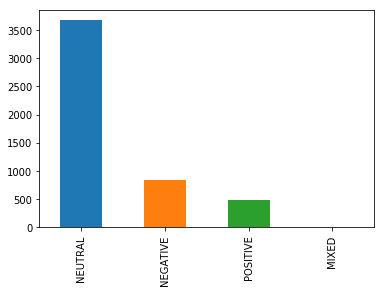

In [29]:
final_result['sentiment'].value_counts().plot.bar()

# Conclusion

From the above chart, which is the sentiment analysis result of Amazon Comprehend, we can see that almost 70% of the customers’ sentiments among the first 5000 conversations are neutral, following by 20% of the customers’ negative sentiments.

# Recommendation 

Since up to 70% of the first 5000 conversations from customers’ sentiment scores are below zero, which indicate negative sentiments, we need to understand the causes of their negative emotions. It is also worthwhile to conduct analysis to see if there is any improvement on customers’ sentiments as the conversation goes on with customer supports. 
Since AWS and GCP have the limit times of free API calls, the limit in our analysis is that we can only focus on the first 5000 conversations. It is also worthwhile to improve our analysis by reviewing the whole conversation dataset to see if there is any bias in the first 5000 samples.
